In [1]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
from PIL import Image
import cv2
from tensorflow import keras

D0706 10:21:43.939387155      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0706 10:21:43.939407725      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0706 10:21:43.939411037      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0706 10:21:43.939413777      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0706 10:21:43.939416374      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0706 10:21:43.939418863      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0706 10:21:43.939421279      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0706 10:21:43.

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE + (3,))])

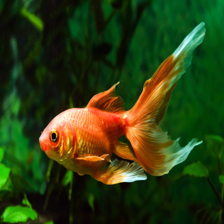

In [3]:
img = Image.open('/kaggle/input/images/goldfish.jpeg').resize(IMAGE_SHAPE)
img

In [4]:
import matplotlib.pyplot as plt 

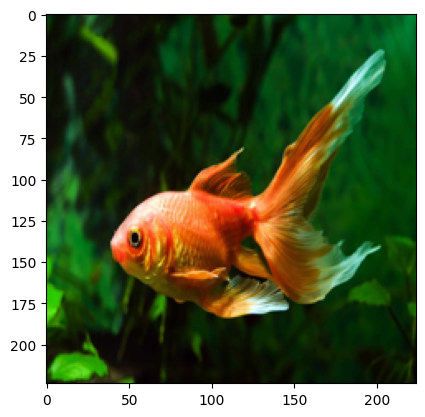

In [5]:
plt.imshow(img)

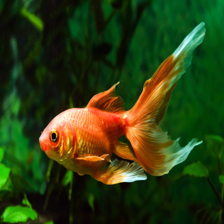

In [6]:
img

In [7]:
img = cv2.imread('/kaggle/input/images/goldfish.jpeg')
img = img / 255
img

array([[[0.0745098 , 0.24705882, 0.01568627],
        [0.0745098 , 0.24705882, 0.01568627],
        [0.0745098 , 0.24705882, 0.01568627],
        ...,
        [0.19215686, 0.50980392, 0.01176471],
        [0.19215686, 0.50980392, 0.01176471],
        [0.19215686, 0.50980392, 0.01176471]],

       [[0.0745098 , 0.24705882, 0.01568627],
        [0.0745098 , 0.24705882, 0.01568627],
        [0.0745098 , 0.24705882, 0.01568627],
        ...,
        [0.19215686, 0.50980392, 0.01176471],
        [0.19215686, 0.50980392, 0.01176471],
        [0.19215686, 0.50980392, 0.01176471]],

       [[0.0745098 , 0.24705882, 0.01568627],
        [0.0745098 , 0.24705882, 0.01568627],
        [0.0745098 , 0.24705882, 0.01568627],
        ...,
        [0.19215686, 0.50980392, 0.01176471],
        [0.19215686, 0.50980392, 0.01176471],
        [0.19215686, 0.50980392, 0.01176471]],

       ...,

       [[0.01176471, 0.10980392, 0.09411765],
        [0.01176471, 0.10980392, 0.09411765],
        [0.01176471, 0

In [8]:
img.shape

(1510, 2500, 3)

In [9]:
img = cv2.resize(img, IMAGE_SHAPE)
img.shape

(224, 224, 3)

In [10]:
img = img[np.newaxis, ...]
img.shape

(1, 224, 224, 3)

In [11]:
img

array([[[[0.0745098 , 0.24705882, 0.01568627],
         [0.06071429, 0.21176471, 0.        ],
         [0.04705882, 0.17647059, 0.00157563],
         ...,
         [0.19530812, 0.51295518, 0.01491597],
         [0.19215686, 0.50980392, 0.01176471],
         [0.19215686, 0.50980392, 0.01176471]],

        [[0.0745098 , 0.24705882, 0.01568627],
         [0.06071429, 0.21176471, 0.        ],
         [0.04705882, 0.17647059, 0.00157563],
         ...,
         [0.18746499, 0.50511204, 0.00707283],
         [0.18431373, 0.50196078, 0.00392157],
         [0.18431373, 0.50196078, 0.00392157]],

        [[0.06666667, 0.23921569, 0.00784314],
         [0.05997899, 0.21866246, 0.00824502],
         [0.04429272, 0.1858323 , 0.02704379],
         ...,
         [0.20111138, 0.50511204, 0.00707283],
         [0.1961469 , 0.4960442 , 0.01183317],
         [0.19959202, 0.49432163, 0.0152783 ]],

        ...,

        [[0.00253852, 0.18569678, 0.09665616],
         [0.0079474 , 0.24231521, 0.12041317]

In [12]:
res = classifier.predict(img)
res.shape

1/1 [==============================] - 1s 779ms/step


(1, 1001)

In [13]:
label_file = keras.utils.get_file('ImageNetLabels', origin = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt', cache_dir='.')

10484/10484 [==============================] - 0s 0us/step


In [14]:
label_file

'./datasets/ImageNetLabels'

In [15]:
image_labels = []

with open(label_file, 'r') as f:
    image_labels = f.read().splitlines()

In [16]:
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [17]:
res.shape

(1, 1001)

In [18]:
np.argmax(res)

89

In [19]:
res = res.reshape(1001,)

In [20]:
res.shape

(1001,)

In [21]:
res[:5]

array([0.35041603, 3.6952512 , 5.167412  , 0.6701509 , 2.1730714 ],
      dtype=float32)

In [22]:
np.argmax(res)

89

In [23]:
res[89]

5.5235915

In [24]:
image_labels[np.argmax(res)]

'macaw'

**Load Flower Dataset**

In [25]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir='.', untar = True)
data_dir

228813984/228813984 [==============================] - 1s 0us/step


'./datasets/flower_photos'

In [26]:
import pathlib

In [27]:
datadir = pathlib.Path(data_dir)
datadir

PosixPath('datasets/flower_photos')

In [28]:
list(datadir.glob('*'))

[PosixPath('datasets/flower_photos/LICENSE.txt'),
 PosixPath('datasets/flower_photos/roses'),
 PosixPath('datasets/flower_photos/dandelion'),
 PosixPath('datasets/flower_photos/daisy'),
 PosixPath('datasets/flower_photos/tulips'),
 PosixPath('datasets/flower_photos/sunflowers')]

In [29]:
flower_dict = {
    'roses': list(datadir.glob('roses/*')),
    'sunflowers': list(datadir.glob('sunflowers/*')),
    'dandelion': list(datadir.glob('dandelion/*')),
    'tulips': list(datadir.glob('tulips/*')),
    'daisy': list(datadir.glob('daisy/*')),
}

In [30]:
flower_dict_labels = {
    'roses': 0,
    'sunflowers': 1, 
    'dandelion': 2,
    'tulips': 3,
    'daisy': 4
}

In [31]:
flower_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/18389368680_91c24a2087_z.jpg'),
 PosixPath('datasets/flower_photos/roses/4797595918_79887b1229_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15901230359_1819e96b89_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2141413229_3f0425f972_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg')]

In [32]:
x = []
y = []

for name, images in flower_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        x.append(resized_img)
        y.append(flower_dict_labels[name])

In [33]:
x = np.array(x)
y = np.array(y)

In [34]:
x.shape

(3670, 224, 224, 3)

In [35]:
y.shape

(3670,)

In [36]:
x = x / 255

In [37]:
x[0]

array([[[0.59607843, 0.92941176, 0.81960784],
        [0.60392157, 0.92156863, 0.81960784],
        [0.59607843, 0.92156863, 0.82352941],
        ...,
        [0.        , 0.16078431, 0.0627451 ],
        [0.00784314, 0.17254902, 0.0745098 ],
        [0.        , 0.16470588, 0.0627451 ]],

       [[0.6       , 0.92941176, 0.81960784],
        [0.60784314, 0.9254902 , 0.81960784],
        [0.6       , 0.92156863, 0.82352941],
        ...,
        [0.        , 0.16078431, 0.05882353],
        [0.00784314, 0.17254902, 0.0745098 ],
        [0.        , 0.16470588, 0.06666667]],

       [[0.6       , 0.92941176, 0.81960784],
        [0.61176471, 0.9254902 , 0.81960784],
        [0.60392157, 0.9254902 , 0.82352941],
        ...,
        [0.        , 0.15294118, 0.0627451 ],
        [0.00784314, 0.16862745, 0.0745098 ],
        [0.00392157, 0.17254902, 0.07058824]],

       ...,

       [[0.00784314, 0.29019608, 0.20392157],
        [0.00392157, 0.27058824, 0.18039216],
        [0.00392157, 0

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [39]:
len(x_train)

2936

In [40]:
len(x_test)

734

In [41]:
x_train[0].shape

(224, 224, 3)

In [42]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224, 224, 3), trainable=False
)

In [43]:
224 * 224 * 3

150528

In [44]:
model = keras.Sequential([
    pretrained_model_without_top_layer,
    keras.layers.Dense(5, activation = 'sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [45]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [46]:
x_train[0]

array([[[0.22745098, 0.        , 0.18039216],
        [0.22745098, 0.00784314, 0.17647059],
        [0.22745098, 0.00784314, 0.17647059],
        ...,
        [0.21960784, 0.02745098, 0.2       ],
        [0.21176471, 0.02352941, 0.18823529],
        [0.22352941, 0.02745098, 0.19215686]],

       [[0.22745098, 0.        , 0.18039216],
        [0.22352941, 0.00392157, 0.17254902],
        [0.22352941, 0.00392157, 0.17254902],
        ...,
        [0.21568627, 0.02352941, 0.19607843],
        [0.20784314, 0.01960784, 0.18823529],
        [0.21568627, 0.01960784, 0.18431373]],

       [[0.22745098, 0.00392157, 0.18039216],
        [0.22352941, 0.00392157, 0.17254902],
        [0.22745098, 0.00784314, 0.17647059],
        ...,
        [0.21568627, 0.02352941, 0.19607843],
        [0.22352941, 0.03137255, 0.20392157],
        [0.22352941, 0.02745098, 0.2       ]],

       ...,

       [[0.19215686, 0.        , 0.14901961],
        [0.19215686, 0.        , 0.14901961],
        [0.19215686, 0

In [47]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
92/92 [==============================] - 19s 168ms/step - loss: 0.8198 - accuracy: 0.6999
Epoch 2/5
92/92 [==============================] - 15s 160ms/step - loss: 0.4091 - accuracy: 0.8607
Epoch 3/5
92/92 [==============================] - 15s 161ms/step - loss: 0.3253 - accuracy: 0.8934
Epoch 4/5
92/92 [==============================] - 15s 164ms/step - loss: 0.2717 - accuracy: 0.9179
Epoch 5/5
92/92 [==============================] - 15s 164ms/step - loss: 0.2312 - accuracy: 0.9329


In [48]:
model.evaluate(x_test, y_test)

23/23 [==============================] - 4s 164ms/step - loss: 0.3818 - accuracy: 0.8583


[0.38183027505874634, 0.8583106398582458]

In [49]:
y_pred = model.predict(x_test)

23/23 [==============================] - 4s 171ms/step


In [51]:
y_pred = [np.argmax(i) for i in y_pred]

In [52]:
y_pred[:5]

[1, 0, 4, 1, 1]

In [53]:
y_test[:5]

array([1, 0, 4, 1, 1])

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       128
           1       0.88      0.94      0.91       140
           2       0.91      0.89      0.90       179
           3       0.82      0.86      0.84       160
           4       0.86      0.76      0.81       127

    accuracy                           0.86       734
   macro avg       0.86      0.85      0.85       734
weighted avg       0.86      0.86      0.86       734



In [58]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[105,   3,   1,  16,   3],
       [  1, 131,   1,   2,   5],
       [  1,   5, 160,   5,   8],
       [ 17,   5,   1, 137,   0],
       [  4,   5,  13,   8,  97]])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 6.9 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


Text(95.72222222222221, 0.5, 'Truth')

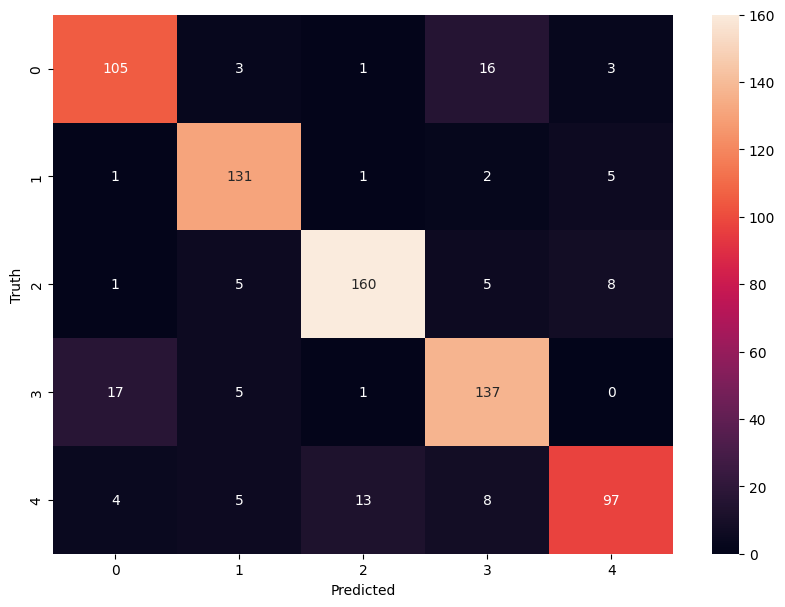

In [60]:
!pip install seaborn
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')